<a href="https://colab.research.google.com/github/bakhadir0v/COMP215/blob/main/labs/lab01-introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

COMP 215 - LAB 1  
----------------
#### Name(s):Ata
#### Date:08.01.2025


By the end of this lab you should be able to:
- write Python code using Google Colaboratory (Colab)
- save the code in GitHub
- submit the code on eLearn  


During this lab, you will be introduced to the following:
- Application Programming Interfaces (API's)
- JSON data formats
- list comprehension in Python
- plotting with matplotlib  



## Google Colaboratory Introduction

You will need a Google gmail account to access and use Colab.  You can use your personal gmail account, or you can create a gmail account just for this class.

Accroding to the Google AI Overview;
  *  *Google Colaboratory (Colab), is a free, cloud-based environment for writing and running Python code in a browser. It's a popular tool in the data science and machine learning communities for tasks that require a lot of computing power, such as: Analyzing large amounts of data, Training machine learning models, and Testing deep learning algorithms.*  

Colab is an online interactive Python notebook environment.  An interactive notebook is a programming environment that allows you to interlace code, formatted text, data, and graphical output all in a single document. These notebooks are easy to distribute on the web and can be viewed and executed without any additional software installation or configuration, making them an ideal platform for sharing research and analysis. They are widely used in scientific computing and in data science applications where the emphasis is on using code to clearly communicate rather than building an end-user app.  Interactive Python notebooks use the file extension `.ipynb` instead of `.py`.  

You can find more information about Jupyter Notebooks at [jupyter.org](https://jupyter.org/).  Note that you do not need to install Jupyter on your computer because we are using Colab.  In a notebook you write the code in Python and the text in a language called Markdown.  You can find more information about the Markdown language at [markdownguide.org](https://www.markdownguide.org).  We will be using Colab in this course as the default (but not required) Integrated Development Environment (IDE) for you to write and run Python code.  

 1. Go to [colab.research.google.com](colab.research.google.com)
 2. Log in with your Google (ie. gmail) account.  If you do not already have one, or do not want to use your personal Google account for this course, then please create a Google account specifically for this course.
 3. Create a "New Notebook" to write and run a 'hello world' program just to be sure your account works.  You can delete the new notebook after checking that Colab is working for you.



## Colab & GitHub

You can now open the Notebooks from your GitHub repository in Colab.  

1. In your `comp215` fork, go to `labs` folder and open `lab01_introduction.ipynb`.  Open the file in Google Colaboratory using the [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Hamilton-at-CapU/comp215/blob/main/labs/lab01_introduction.ipynb) button at the top of the file.  Alternatively, for any Python Notebook (`.ipynb` file) in GitHub you can replace in the address bar:
```
github.com → colab.research.google.com/github
```
to open the Notebook in Colab.  For example:
 - in GitHub, this Notebook is ```github.com/Hamilton-at-CapU/comp215/blob/main/labs/lab01-introduction.ipynb```
 - in Colab, this Notebook is ```colab.research.google.com/github/Hamilton-at-CapU/comp215/blob/main/labs/lab01-introduction.ipynb```

2. Alternatively, you can go to [colab.research.google.com](colab.research.google.com) and open the GitHub files directly in the "Open Notebook" pop-up window that appears.

Continue with the rest of this lab in Colab.  



## Committing (saving) changes to GitHub and submitting your lab on eLearn

Below is a code block.  Write a 'hello world' print statement in the code block and run it.

In [ ]:
# This is a code block.
print("HelLo, World")


HelLo, World


#### Text Blocks

Below is a text block.  Write 'hello world' in the text block in bold-italic font.


This is a text block.




 - Now that you have edited the Colab file, it's time to `commit` (ie. save) the changes to your GitHub repository.  Click the `Save in GitHub to keep changes` in the Colab menu bar to save your changes to your GitHub repository.
 - A window will pop up, allowing you to select which repository, branch, and file path to commit it to (the defaults should be correct), as well as enter a `Commit message`.  This `Commit message` appears in GitHub beside the filename; it is meant to be a short reminder of what you last changed in the file.  So, something like 'first commit' would make sense for this one.  There is also an `Include a link to Colab` tick box, please select it so that I can easily open your code from GitHub.  
 - Go to GitHub and check that your changes were committed to your repository.
 - Submit your lab by copying the URL of your lab file in GitHub to the submission link in eLearn.  The URL should be something like:

 ```https://github.com/YourAwesomeUsername/comp215/blob/main/labs/lab01_introduction.ipynb```

 (note that it is a link to github.com, not colab.research.google.com)
 - You can now continue to edit your code in Colab, commit the changes to GitHub, and the link you submitted on eLearn will include the new commits.  I will be able to see the date/time and changes of each of your GitHub commits, so please don't commit any changes after the due date of the lab.

## Finally, now for Some Coding!

Now that you understand how to submit your code, let's actaully write some code.  For this first lab we will be plotting some earthquake data from the [U.S. Geological Survey (USGS)](https://www.usgs.gov/programs/earthquake-hazards) [API](https://earthquake.usgs.gov/fdsnws/event/1/).


### What is an API?

An API (Application Programming interface) is a way for two different applications to communicate. Whilst the term applies to any two programs we are using it to refer to the API of a web service that provides data.  To retrieve data from an API, a request to a remote web server is made.  For example, if you want to build an application which plots stock prices, you would use the API of something like google finance to request the current stock prices (ref [API tutorial](https://colab.research.google.com/github/nestauk/im-tutorials/blob/3-ysi-tutorial/notebooks/APIs/API_tutorial.ipynb)).

The code below retrieves earthquake information for all 'green' level earthquakes that occured in 2024 using the ['geojson' format](https://earthquake.usgs.gov/earthquakes/feed/v1.0/geojson.php).  Note that similar information can be retrieved using a [USGS ComCat library](https://code.usgs.gov/ghsc/esi/libcomcat-python/-/blob/main/docs/api.md), but we will not use that method for this lab.


In [2]:
# imports for API request
import requests
import json

In [105]:
# define the API parameters
params_dict = {'format': 'geojson', 'starttime': '2024-01-01', 'endtime': '2024-12-31', 'alertlevel': 'green'}
api_url = 'https://earthquake.usgs.gov/fdsnws/event/1/query?'

# make the API request
response = requests.get(api_url, params = params_dict)

# convert the response to json format data
data = json.loads(response.text)

# print out some of the data 'features'
for event in (data['features']):
  print(event['properties']['time'], event['geometry']['coordinates'], event['properties']['place'], event['properties']['mag'])


1735549491960 [-155.495, 19.1953333333333, 30.78] 1 km WSW of Pāhala, Hawaii 4.32
1735537267347 [-71.9768, -29.9598, 10] 61 km W of Coquimbo, Chile 5.5
1735537249444 [-72.0574, -29.9318, 10] 69 km W of Coquimbo, Chile 5.5
1735527376877 [120.8426, 18.4642, 34] 11 km SE of Bangui, Philippines 5.5
1735477352023 [-76.248, 46.9815, 10] 57 km NNW of Saint-Boniface, Canada 3.7
1735415840170 [-177.9075, -20.4629, 550.592] 282 km WNW of Houma, Tonga 5.5
1735324978864 [126.3603, 9.5628, 56.092] 34 km SE of Union, Philippines 5.5
1735303657039 [151.2223, 47.2476, 146] Kuril Islands 6.8
1735277407667 [-38.6804, 34.1574, 10] northern Mid-Atlantic Ridge 5.9
1735246945778 [141.8463, 30.4847, 10] Izu Islands, Japan region 5.7
1735108488698 [-177.5439, -19.1289, 458.796] Fiji region 5.6
1735080145726 [-67.3792, -28.2378, 138] 26 km SE of Tinogasta, Argentina 5.9
1734933659074 [-76.5153, 19.9162, 22.241] 37 km S of Guisa, Cuba 5.9
1734839764489 [-153.9973, 55.9825, 9.2] 107 km S of Akhiok, Alaska 5.6
17

The code below produces a plot showing the longitude and latitude of the earthquakes in the data.

In [4]:
# imports for plotting
import matplotlib.pyplot as plt

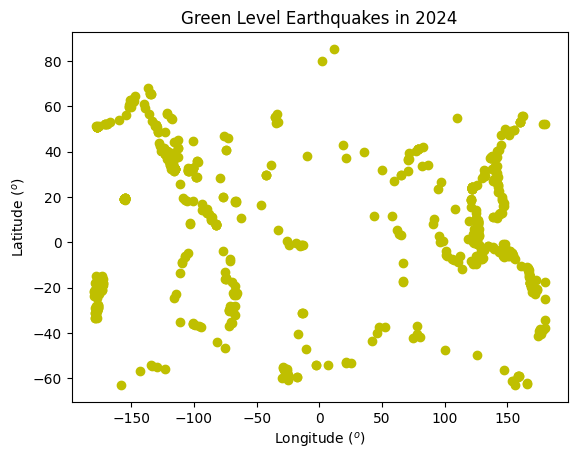

In [9]:
# extract the longitudes and latitudes for the earthquake events
# the following lines of code use Python's "list comprehension" to write an accumulator loop
# if you are not familiar with list comprehension, look it up!
locations = [feature['geometry']['coordinates'] for feature in data['features']]
longitudes = [location[0] for location in locations]
latitudes = [location[1] for location in locations]

# make a matplotlib scatter plot with the longitudes and latitudes
# if you are not familiar with matplotlib, look it up!
fig, ax = plt.subplots()
ax.scatter(longitudes, latitudes, color='y', label='Events')
ax.set_xlabel(r'Longitude ($^o$)')
ax.set_ylabel(r'Latitude ($^o$)')
ax.set_title('Green Level Earthquakes in 2024')
plt.show()

### Exercise 1

Write a function that takes the year and the alert level ('green', 'yellow', 'orange', or 'red') as parameters and plots the earthquakes that occured that year.  Use the code above as a guide, but do not use list comprehension and do not rely on global variables in your function.

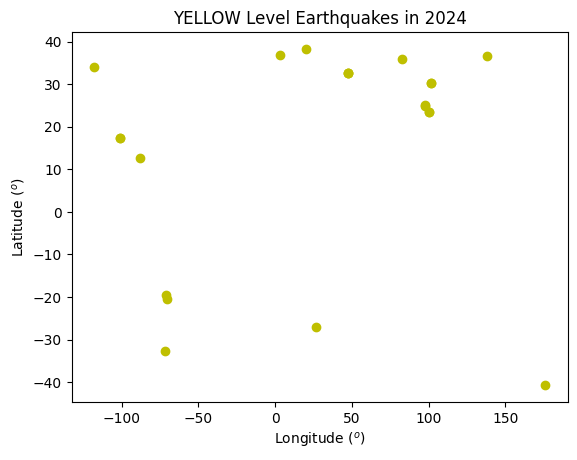

In [106]:
# your Ex. 1 code here

def quake_level(year, level):
  locations = []
  longitudes = []
  latitudes = []
  params_dict['alertlevel'] = level.lower()
  params_dict['starttime'] = year + '-01-01'
  params_dict['endtime'] = year + '-12-31'
  response = requests.get(api_url, params=params_dict)
  data = json.loads(response.text)
  for feature in data['features']:
   locations.append(feature['geometry']['coordinates'])
  for location in locations:
    longitudes.append(location[0])
    latitudes.append(location[1])
  fig, ax = plt.subplots()
  ax.scatter(longitudes, latitudes, color='y', label='Events')
  ax.set_xlabel(r'Longitude ($^o$)')
  ax.set_ylabel(r'Latitude ($^o$)')
  ax.set_title(f'{level} Level Earthquakes in 2024')
  plt.show()

quake_level('2014','YELLOW')

### Challenge Exercise

Write a function that takes a start date and end date as parameters and plots all four levels of earthquakes ('green', 'yellow', 'orange' and 'red') on a single plot.

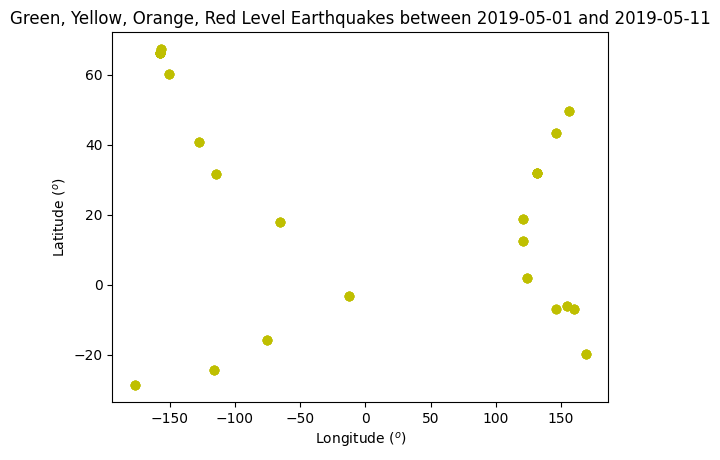

In [110]:
def quake_time(start, end):
  locations = []
  longitudes = []
  latitudes = []
  params_dict = {'format': 'geojson', 'starttime': '2024-01-01', 'endtime': '2024-12-31', 'alertlevel': 'green'}
  params_dict['starttime'] = start
  params_dict['endtime'] = end
  response = requests.get(api_url, params=params_dict)
  data = json.loads(response.text)
  alert_levels = ['green', 'yellow', 'orange', 'red']
  for level in alert_levels:
    params_dict['alertlevel'] = level
    response = requests.get(api_url, params=params_dict)
    data = json.loads(response.text)
    for feature in data['features']:
      locations.append(feature['geometry']['coordinates'])
    for location in locations:
      longitudes.append(location[0])
      latitudes.append(location[1])
  fig, ax = plt.subplots()
  ax.scatter(longitudes, latitudes, color='y', label='Events')
  ax.set_xlabel(r'Longitude ($^o$)')
  ax.set_ylabel(r'Latitude ($^o$)')
  ax.set_title(f'Green, Yellow, Orange, Red Level Earthquakes between {start} and {end}')
  plt.show()

quake_time('2019-05-01','2019-05-11')